In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys, json, math, io
from os import listdir
from os.path import isfile, join
from tqdm.auto import tqdm
import tikzplotlib as tkz

In [3]:
# exp_path = 'exp1/'
exp_path = 'exp2/'
# exp_path = 'exp_sens_a/'

_, filename = os.path.split(os.getcwd())
if filename == 'notebooks':
    old_dir = os.getcwd()
    os.chdir('../experiments/' + exp_path)
    print('Moving Current Directory from ' + old_dir + ' to ' + os.getcwd())
else:
    print('Current Directory is ' + os.getcwd())
    
files = [f for f in listdir('./') if isfile(join('./', f))]
! rm .DS_Store

Current Directory is /Users/ale/Desktop/BAISRB/experiments/exp2
rm: .DS_Store: No such file or directory


In [4]:
data = {}
for i in tqdm(range(len(files))):
    with io.open(files[i], 'rb') as json_file:
        data[int(files[i].split('.')[0])] = json.load(json_file)


  0%|          | 0/22 [00:00<?, ?it/s]

In [5]:
T_list = list(data.keys())

T_list.sort()

algs = list(data[T_list[0]].keys())

n_runs = len(data[T_list[0]][algs[0]]['recommendations'])

T_list, algs, n_runs

([100,
  150,
  200,
  250,
  300,
  350,
  400,
  450,
  500,
  600,
  700,
  800,
  900,
  1000,
  1200,
  1400,
  1600,
  1800,
  2000,
  2400,
  2800,
  3200],
 ['\\uniform',
  '\\uniformsmooth',
  '\\ucbbubeck',
  '\\ucbeshort',
  '\\srbubeck',
  '\\succrejectshort',
  '\\probone',
  '\\etccella',
  '\\restsurecella'],
 100)

 & 100 & 150 & 200 & 250 & 300 & 350 & 400 & 450 & 500 & 600 & 700 & 800 & 900 & 1000 & 1200 & 1400 & 1600 & 1800 & 2000 & 2400 & 2800 & 3200 \\
\uniform & 0.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 0.01(0.02) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) \\
\uniformsmooth & 0.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) \\
\ucbbubeck & 0.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 0.0(0.0) & 0.0(0.0) & 0.0(0.0) \\
\ucbeshort & 0.0(0.0) & 0.46(0.1) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0(0.0) & 1.0

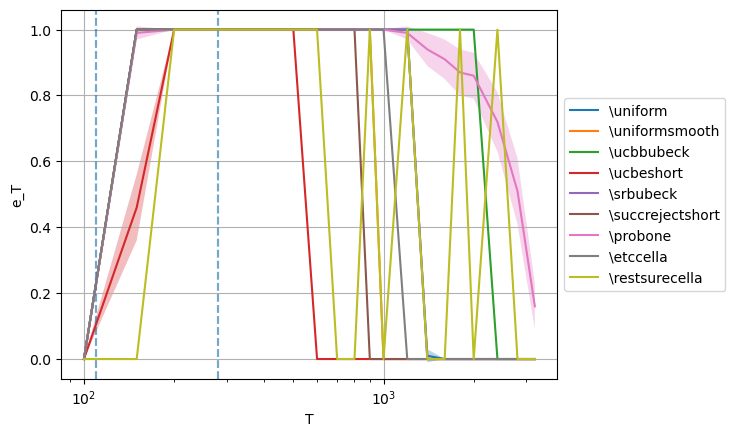

In [7]:
plt.figure()

for T_i, T in enumerate(T_list):
        print(' & ' + str(T) , end='')
print(' \\\\')        
        
for alg_i, alg in enumerate(algs):

    probs = np.zeros((n_runs, len(T_list)))
    # mask = np.ones((n_runs, len(T_list)), dtype=bool)
    
    for T_i, T in enumerate(T_list):
        probs[:, T_i] = data[T][alg]['recommendations']

    # for exp1
    mask = np.zeros(probs.shape, dtype=bool)
    mask[:, :2] = probs[:, :2] != 1
    mask[:, 2:] = probs[:, 2:] != 0
    probs[mask] = 1
    probs[np.logical_not(mask)] = 0


    # for exp2
    '''mask = np.zeros(probs.shape, dtype=bool)
    mask[:, 0] = probs[:, 0] != 1
    mask[:, 1] = probs[:, 1] != 2
    mask[:, 2:] = probs[:, 2:] != 0
    probs[mask] = 1
    probs[np.logical_not(mask)] = 0'''

    # probs[probs > 0] = 1
    mean = np.mean(probs, axis=0)
    std = np.round(2 * np.std(probs, axis=0) / math.sqrt(n_runs), 2)
    bernulli_std = np.round(2 * np.sqrt(mean * (1 - mean) / n_runs), 2)
    plt.plot(T_list, mean, label=alg)
    plt.axvline(185, alpha=.1, ls="--")
    '''plt.axvline(110, alpha=.1, ls="--")
    plt.axvline(280, alpha=.1, ls="--")'''
    plt.fill_between(T_list, mean - std, mean + std, alpha=0.3)
    
    
    print(alg + ' & ', end='')
    for T_i, T in enumerate(T_list):
        print(str(mean[T_i]) + '(' + str(std[T_i]) + ')', end='')
        if T_i < len(T_list) - 1:
            print(' & ', end='')
    print(' \\\\')
    
plt.ylabel('e_T')
plt.xscale('log')
plt.xlabel('T')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
tkz.save("exp2_results.tex")